# COSE 471 Data Science
## Homework Week2-3

- Week 2 : Data and Visual Attributes / Statistical Graphs
- Week 3 : Data Munging

--------------------------------------

__ Ready to enjoy python for data mining __
-  install [python](https://www.python.org/)

- install libraries (option1, recommended)
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard> assignments__.


- install libraries (option2)
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

# Collect and Clean Data
If you want to analysis data, first you would collect and clean data.

- Choose which domain has the data

> Recognize web page architecture to collect each movie (entity)
>
>> Analysis HTML code hierarchy or structure
>>
>> Extract the useful or necessary data
>>
>>> Formatting, Cleaning, and Sampling data
>>> 
>>> Scaling, Decomposition, Aggregation


In this homwork, we will analysis movie review data in [IMDB](http://www.imdb.com/)
(Click the link to see the data for yourself)

To collect movie data, we will implement the function fetching the detail page of movie review.

Page URL is like below.

| Movie Title | Detail page URL |
|------------------------|----------------------------------|
|The Dark Knight (2008)|http://www.imdb.com/title/tt0468569/|
|Inception (2010)|http://www.imdb.com/title/tt1375666/|
|Interstellar (2014) |http://www.imdb.com/title/tt0816692/|
|Avengers: Age of Ultron (2015)|http://www.imdb.com/title/tt2395427/|
| ..... | .....|

As you can see, The detail pages of movie review have similar pattern. 

--------------------------

### Problem 1

Fill in the code for the __get_movie_detaill_page(movie_id)__, that fetches HTML page about the movie of which id is __movie_id__ ( _tt0468569_ is the movie id of 'The Dark Knight' )

from BeautifulSoup import BeautifulSoup__Hint: __ To send request and get response of HTTP, use the   [requests](http://docs.python-requests.org/en/latest/) Library

In [1]:
from BeautifulSoup import BeautifulSoup
import requests

In [2]:
"""
@Function
get_movie_detaill_page

Given a movie_id, return the HTML document.

@Inputs
__
movie_id : str
    The ID of the movie to be fetched

@Returns
___
html : str
    The HTML string for that movie_id
    
@Example
___
>>> get_movie_html('tt0468569')
u'<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">
....
"""
def get_movie_detaill_page(movie_id):
    print "fetching " , movie_id
        
    # your code here (remove 'pass')
    URL = "http://www.imdb.com/title/"+movie_id
    movie_r = requests.get(URL)
    soup = BeautifulSoup(movie_r.text)
#    print soup
    return soup

In [3]:
"""
Problem 1 : Test Code
"""
# test_web_page : http://www.imdb.com/title/t2395427 # Avengers: Age of Ultron (2015)
# movie_id : tt2395427
test_movie_id = 'tt2395427'
test_html = get_movie_detaill_page(test_movie_id)

fetching  tt2395427


-----------------------------------------------

### Problem 2

Until now, we have learned that we could collect a descriptive page of the movie by it's 'movie_id'.

However, the HTML format contains a lot of additional data that are not essential nor integral for our purpose.

Therefore, we need to conduct a method called 'first degree data cleaning', which means extracting the data we need
from the HTML we have recently fetched.

In [6]:
from pattern.web import Element
from pattern import web

__hint: __

- 'Developer Tool' in Browser shortcut
    - IE: F12
- Chrome/ FireFox: Ctrl+ shift + I, cmd + alt + I

![title](https://github.com/MinhwanYu/cose471_2016/blob/master/img/Problem2-ie.png?raw=true)


![title](https://github.com/MinhwanYu/cose471_2016/blob/master/img/Problem2-chrome.png?raw=true)

The movie title of [above web page](http://imdb.com/title/tt1289401/) is in
> ....
>> `<div class="title_wrapper">`
>>> `<h1 itemprop="name" class="">`

You can find and extract the node of 'the movie title' by using css selector query : __.title_wrapper h1[itemprop=name]__

Below is the example of css selector query.

|CSS Selector	| Description|
|------------------------------|------------------------|
|element('*')	|all nested elements|
|element('*#x')	|all nested elements with id="x"|
|element('div#x')	|all nested <div> elements with id="x"|
|element('div.x')	|all nested <div> elements with class="x"|
|element('div[class="x"]')|	all nested <div> elements with attribute "class" = "x"|
|element('div:first-child')|	the first child in a <div>|
|element('div a')	|all nested <a>'s inside a nested <div>|
|element('div, a')|	all nested <a>'s and <div> elements|
|element('div + a')	|all nested <a>'s directly preceded by a <div>|
|element('div > a')	|all nested <a>'s directly inside a nested <div>|
|element('div < a')|	all nested <div>'s directly containing an <a>|

_source: http://www.clips.ua.ac.be/pages/pattern-web _

In [7]:
"""
@Function
parsing_detail_page

Given a HTML string, return the useful data.

@Inputs
---
html: str
    The HTML for the movie_id

@Returns
----
object: dict (all value is str, not casting!)
    {
     'duration': 
     'genre': 
     'rating': 
     'rating_count': 
     'review_count': 
     'title': 
     'year': 
     }
"""
def parsing_detail_page(html):
    # your code here (remove 'pass')
    element = web.Element(html)

    duration = element('.subtext time')[0].content
    
    genre = html.findAll('span',{'itemprop':'genre'})
    genre_clean = [component.text for component in genre]
    
    rating = html.findAll('span',{'itemprop':'ratingValue'})
    rating_clean = [component.text for component in rating]

    rating_count = html.findAll('span',{'itemprop':'ratingCount'})
    rating_count_clean = [component.text for component in rating_count]

    review_count = html.findAll('a',{'href':'reviews?ref_=tt_ov_rt'})
    review_count_clean = [component.text for component in review_count]

#    title = html.findAll('h1',{'itemprop':'name'})
#    title_split = title.split('&nbsp')[0]
#    title_clean = [component.text for component in title.split]
    
    title = element('.title_wrapper h1')[0].content
    title_split = title.split('&nbsp')[0]
    
    
    year = element('.title_wrapper h1 a')[0].content
    
        
    dict = {
     'duration': duration.strip(),
     'genre': genre_clean,
     'rating': rating_clean,
     'rating_count': rating_count_clean,
     'review_count': review_count_clean,
     'title': title_split,
     'year': year.strip()
     }
 
    return dict

In [8]:
"""
Problem 2 : Test Code
"""
test_parsing = parsing_detail_page(test_html)
test_parsing

{'duration': u'2h 21min',
 'genre': [u'Action', u'Adventure', u'Sci-Fi'],
 'rating': [u'7.5'],
 'rating_count': [u'419,182'],
 'review_count': [u'1,093 user'],
 'title': u'Avengers: Age of Ultron',
 'year': u'2015'}

### Problem 3

Value of the data type of extraction results are 'str' (string).
Which type of each value? (e.g. str, float, list, dict, ...)

Erase unnecessary part of the value or change the unit, if necessary.

_Your Answer Here:_

| Key             | Current Valuee                          | Data Type | Expected Value |
|---------------------------|-------------------------------------------------------------------|----------------------|---------------------------------|
| title             |'Avengers: Age of Ultron'           |  str          | 'Avengers: Age of Ultron' |
| year            | '2015'                                    |            |  |
| genre          | ['Action', 'Adventure', 'Sci-Fi']    |     |  |
|duration       | '2h 21min'                               |           |  |
|rating           |  '7.5'                                      |         |   |
|rating_count | '401,155'                               |            |   |
|review_count| 'See all 1,077 user reviews'      |          |  |

### Problem 4

Write a function to convert the data type in __Problem3__

If necessary, please implement additional functions.

__Hint : __ Implementing _str2minute_, _str2number_ function


In [9]:
"""
@Function
parsing_convert_dt
Given a parsing result, return the casting result

@Inputs
---
data: dict
    parsing result

@Returns
----
data : dict
    casting result
"""
import re

def parsing_convert_dt(data):
    # your code here (remove 'pass')
    def str2number(number_str):
        if number_str is None:
            return None
        else:
            number_str = re.sub("[^0-9]", "", number_str) # 정규식. 문자열에서 특정 정보만 취득하고 싶은 경우.
            #return int(number_str)
            if(number_str == "") : 
                number_str = '1';
            return int(float(number_str))
    
    def str2minutes(time_str):
        if time_str is None:
            return None
        else:
            time_str = re.sub("[^0-9]", "", time_str) # 정규식. 문자열에서 특정 정보만 취득하고 싶은 경우.
            #return int(number_str)
            if(time_str == "") : 
                time_str = '1';
            return int(float((time_str[0]))*60+float(time_str[1:3]))
    
    data['duration'] = str2minutes(data['duration'])
    data['genre']=str(data['genre'])
    data['year']=int(data['year'])
    data['rating'] = float(data['rating'][0])
    data['rating_count'] = str2number(data['rating_count'][0])
    data['review_count'] = str2number(data['review_count'][0])
    print type(data['review_count'] )
    
    data['title'] = str(data['title'])
    data['year'] = int(data['year'])
  
    return data

In [10]:
"""
Problem 4 : Test Code
"""
test_data = parsing_convert_dt(test_parsing)
test_data

<type 'int'>


{'duration': 141,
 'genre': "[u'Action', u'Adventure', u'Sci-Fi']",
 'rating': 7.5,
 'rating_count': 419182,
 'review_count': 1093,
 'title': 'Avengers: Age of Ultron',
 'year': 2015}

### Problem 5

If you have succeeded in following all the steps above correctly,

you should now be capable of scrapping a descripted page of any movie you want.

However this implementation is only possible when you have the precise id data of the movie

(In this case, the data we want is contained in 'movie_id').

In order to obtain a larger data, we will need to scrap the movie_id set from the movie list page.

If you look at the list page carefully, you can observe that the movies are sorted in order of its popularity.

|Year | Page | Search URL |
|----------|-------------|--------------------------|
|2016|1 |http://www.imdb.com/search/title?title_type=feature&release_date=2016|
|2016|2 |http://www.imdb.com/search/title?title_type=feature&release_date=2016&start=51|
|2016|3 |http://www.imdb.com/search/title?title_type=feature&release_date=2016&start=101|
|2016|...|...|
|2015|1|http://www.imdb.com/search/title?title_type=feature&release_date=2015|
|2015|2|http://www.imdb.com/search/title?title_type=feature&release_date=2015&start=51|
|2015|...|...|
|2014|1|http://www.imdb.com/search/title?title_type=feature&release_date=2014|
| .... | ....| ... |

Now you need to define a function that extracts a movie id set from the given movie search page.

In [11]:
"""
@Function
parsing_year_page

Given a year, fetch search result page and return the movie ids in that search page

@Inputs
---
year: int
    the year in which you want to search
    
page: int (optional, default=1)
    the page of the search page in that year

@Returns
---
movie_ids: array
"""
# each page has 50 movies sorted by popularity
def get_movie_ids_in_year(year, page=1): # if no parameters are passed, set default as page 1  
    # your code here (remove 'pass')
    if page ==1:
        URL = "http://www.imdb.com/search/title?title_type=feature&release_date="+str(year)
    else:
        URL = "http://www.imdb.com/search/title?title_type=feature&release_date="+str(year)+"&start="+str((50*(page-1)+1))
       
    movie_page = requests.get(URL)
    
    soup = BeautifulSoup(movie_page.text)
    element = web.Element(soup)

    movie_lst = soup.findAll('span',{'class':'wlb_wrapper'})

    def delete_str(number_str):
        if number_str is None:
            return None
        else:
            number_str = re.sub("[^0-9]", "", number_str) # 정규식. 문자열에서 특정 정보만 취득하고 싶은 경우.
            #return int(number_str)
            if(number_str == "") : 
                number_str = '1';
            return number_str
    
    movie_ids =[]
    
#    for i in movie_lst:
    for i in range(50):
        movie_ids.append('tt'+delete_str(str(movie_lst[i])))
    

    return movie_ids

In [12]:
"""
Problem 5 : Test Code
"""
get_movie_ids_in_year(2014, 3) 

['tt2170439',
 'tt1020072',
 'tt1043726',
 'tt2103254',
 'tt1596345',
 'tt2170593',
 'tt2937898',
 'tt3210686',
 'tt2626350',
 'tt1247690',
 'tt1772264',
 'tt2024469',
 'tt2145829',
 'tt2639254',
 'tt2980648',
 'tt3442006',
 'tt0903657',
 'tt2980592',
 'tt0365907',
 'tt2172934',
 'tt2039393',
 'tt1924435',
 'tt2720680',
 'tt3203616',
 'tt2402157',
 'tt2318092',
 'tt2910814',
 'tt2096672',
 'tt1767372',
 'tt1205537',
 'tt3149038',
 'tt1216491',
 'tt2140619',
 'tt1837709',
 'tt2192016',
 'tt1626146',
 'tt1742334',
 'tt3169706',
 'tt2467046',
 'tt2428170',
 'tt2139555',
 'tt3179568',
 'tt1109624',
 'tt3294200',
 'tt1726592',
 'tt1791682',
 'tt3318750',
 'tt1972571',
 'tt1698641',
 'tt2614684']

--------------------------------------------------------------------------------------------------
__Caution: Below code block needs a lot of time to finish. Please just download dump data__

Combining the functions you have implemented above, you can scrap the top 150 movies from 2000 to 2015.

In [23]:
years = range(2000, 2016) # 2000 ~ 2015 year
pages = range(1,4) # 1 ~ 3 page

def get_data(years, pages=[1]):
    movie_ids = [movie_id
                 for year in years
                 for page in pages
                 for movie_id in get_movie_ids_in_year(year, page)]
    
    data = { movie_id : parsing_detail_page(get_movie_detaill_page(movie_id))
            for movie_id in movie_ids}
    
    return data

In [ ]:
data = get_data(years, pages)

In [ ]:
# save crawling data dump
import json
data_str = json.dumps(data)
f = open('data/imdb_cose471_sample.json', 'a')
f.write(data_str)
f.close()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1. download [dump data](https://raw.githubusercontent.com/MinhwanYu/cose471_2016/master/data/imdb_cose471_sample_missingdata.json)
 ( top150 movies from 2000 to 2015)

2. execute below code.

In [31]:
import json

In [32]:
# load crawling data dump
f = open('C:/data/imdb_cose471_sample_missingdata.json')
json_str = f.read()
f.close()

data = json.loads(json_str)

__Data describtion __
```python
data = [
     'tt0265087': {
         u'rating': 4.8, 
         u'review_count': 164, 
         u'title': u'Black Knight', 
         u'genre': [u'Adventure', u'Comedy', u'Fantasy'],
         u'rating_count': 29727, 
         u'year': 2001, 
         u'duration': 95},
     'tt1430132' : {
         u'rating': 6.7, 
         u'review_count': 525, 
         u'title': u'The Wolverine', 
         u'genre': [u'Action', u'Adventure', u'Sci-Fi'], 
         u'rating_count': 310689, 
         u'year': 2013, u'duration': None},
     'tt3262990': None,
     ......]
```

# Data Wrangling

### Problem 6
There are missing data in Dump which you download.

Remove the data having missing (e.g. None) value.

In [33]:
"""
data : original data
clean_data : cleaned data which have no None values
"""
# your code here
clean_data = dict([(vkey, vdata) for vkey, vdata in data.iteritems() if(vdata) ])


In [34]:
"""
Problem 6 : Test Code

Expected Result : [] (empty list)
"""
empty_data_movies = [ movie_id 
               for movie_id, movie_data in clean_data.items()
               if movie_data is None]
print empty_data_movies

[]


------------

In [35]:
import pandas as pd

movies = pd.DataFrame(clean_data)
movies.head()

,tt0035423,tt0118589,tt0118694,tt0119004,tt0120630,tt0120667,tt0120679,tt0120681,tt0120737,tt0120755,...,tt4046784,tt4062536,tt4178092,tt4263482,tt4270516,tt4285496,tt4382872,tt4441422,tt4552524,tt4935334
duration,118,104,None,89,84,106,123,122,178,123,...,132,94,108,92,79,125,83,85,94,89
genre,"[Comedy, Fantasy, Romance]","[Drama, Music, Romance]","[Drama, Romance]","[Comedy, Drama]","[Animation, Family, Comedy]","[Action, Adventure, Sci-Fi]","[Biography, Drama, Romance]","[Mystery, Thriller]","[Adventure, Drama, Fantasy]","[Action, Adventure, Thriller]",...,"[Action, Sci-Fi, Thriller]","[Crime, Horror, Thriller]","[Mystery, Thriller]","[Horror, Mystery]","[Comedy, Drama]","[Adventure, Drama, History]","[Action, Thriller]",[Thriller],[Horror],"[Horror, Sci-Fi, Thriller]"
rating,6.4,2.1,8.1,5.9,7,5.7,7.4,6.8,8.8,6.1,...,6.4,7.2,7.1,7.4,6.8,8.2,3.9,4.5,4.7,6
rating_count,62715,19156,71915,3000,135665,259789,59691,121681,1190530,233464,...,116554,1031,64694,10928,5505,2690,3090,442,3152,2296
review_count,313,307,344,16,358,1004,271,539,5038,1421,...,337,8,251,165,43,17,25,9,28,19


### Problem 7

The duration value of some data is 'null' or 'None'

In [36]:
tmp_df = movies.copy().transpose()
tmp_df['duration'].isnull().head()

tt0035423    False
tt0118589    False
tt0118694     True
tt0119004    False
tt0120630    False
Name: duration, dtype: bool

Fill the average duration value of all movies in the missing one.

In [37]:
# your code here
dur_avg = int(tmp_df['duration'].mean(axis=0))
tmp_df.duration = tmp_df.fillna(dur_avg)

In [38]:
"""
Problem 7 : Test Code

Expected Result : All results are 'False'
"""
tmp_df['duration'].isnull().head()

tt0035423    False
tt0118589    False
tt0118694    False
tt0119004    False
tt0120630    False
Name: duration, dtype: bool

# Data Explore: Aggregation and Visualization

### Problem 8

Group the data by the standard 'year'.

After using '.describe()', you should see

|        |              |duration | rating | rating_count | review_count | title |
|-----------|-------------------|------------------|--------------|---------------------------|----------------------------|-----------|
|__year__  | | | | | ||
|__2000__| __count__ | 150 | 150.0 | 150 | 150|150|
|| __unique__ | 61 | 47.0 | 150 | 130 |150|
|| __top__ | 90 | 7.3 | 17151| 89 |The Adventures of Rocky &amp; Bullwinkle|
|| __freq__ | 7 | 8.0 | 1 | 3 |1|
|__2001__| __count__ | 150 | 150.0 | 150 | 150|150|
|....|....|....|....|....|....|....|

In [39]:
movies = tmp_df
#your code here
year_group_movies = movies.groupby('year')

In [40]:
"""
Problem 8 : Test Code
"""
year_group_movies.describe()

duration  rating  rating_count  review_count  \
year                                                        
2000 count        150   150.0           150           150   
     unique        61    47.0           150           130   
     top          107     7.3         17151            89   
     freq          11     8.0             1             3   
2001 count        150   150.0           150           150   
     unique        59    43.0           150           137   
     top          106     6.2         37884           204   
     freq           8     9.0             1             3   
2002 count        150   150.0           150           150   
     unique        60    39.0           150           142   
     top          107     6.7        146943            59   
     freq          10     9.0             1             2   
2003 count        150   150.0           150           150   
     unique        65    43.0           150           136   
     top           90     5.8       1166846           370   
     freq           6     9.0             1             3   
2004 count        150   150.0           150           150   
     unique        62    43.0           150           136   
     top          107     5.9        288293           152   
     freq           9     8.0             1             3   
2005 count        150   150.0           150           150   
     unique        59    42.0           150           135   
     top          103     6.5         89343           185   
     freq           7     9.0             1             3   
2006 count        150   150.0           150           150   
     unique        61    38.0           150           133   
     top          107     6.4         75773           188   
     freq           8     9.0             1             3   
2007 count        150   150.0           150           150   
     unique        57    36.0           150           135   
...               ...     ...           ...           ...   
2008 top          104     6.6        189344            97   
     freq           8    11.0             1             3   
2009 count        150   150.0           150           150   
     unique        58    40.0           150           129   
     top          107     6.6         55551           208   
     freq           8    10.0             1             4   
2010 count        150   150.0           150           150   
     unique        49    39.0           150           133   
     top          107     6.4        136703           308   
     freq          12    15.0             1             3   
2011 count        150   150.0           150           150   
     unique        55    39.0           150           132   
     top          107     7.1        507390            68   
     freq          15    10.0             1             2   
2012 count        150   150.0           150           150   
     unique        64    36.0           150           137   
     top           95     6.5        100725           129   
     freq           9    11.0             1             4   
2013 count        150   150.0           150           150   
     unique        56    34.0           150           136   
     top          107     6.7        156197           231   
     freq          12    11.0             1             3   
2014 count        150   150.0           150           150   
     unique        57    35.0           150           138   
     top          107     6.3          5631           285   
     freq           8    10.0             1             3   
2015 count        147   147.0           147           147   
     unique        56    39.0           147           122   
     top          107     6.4         64765           110   
     freq           8     9.0             1             4   

                                                title  
year                                                   
2000 count                                        150  
 

### Problem 9

Find the minimum, maximum, average number of reviews by each year.

In [25]:
review_statistics = dict();
# your code here
review_statistics['max'] = year_group_movies['review_count'].max()
review_statistics['mean'] = year_group_movies['review_count'].sum()/150
review_statistics['min'] =year_group_movies['review_count'].min()

review_statistics = pd.DataFrame(review_statistics)
del review_statistics.index.name

In [26]:
"""
Problem 9 : Test Code
"""
review_statistics

,max,mean,min
2000,2352,392.613333,8
2001,5038,484.953333,16
2002,3503,456.033333,26
2003,3162,450.220000,9
2004,2799,488.180000,10
2005,3276,503.180000,22
2006,2362,474.580000,41
2007,1895,382.226667,15
2008,4516,358.553333,17
2009,3040,318.280000,11


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

### Problem 10
Given the x-axis as 'year', plot the max and mean 

> x-aixs : year
>
> y-aixs : real value
>
>> line1 : max (color: red)
>>
>> line2 : mean (color: green)

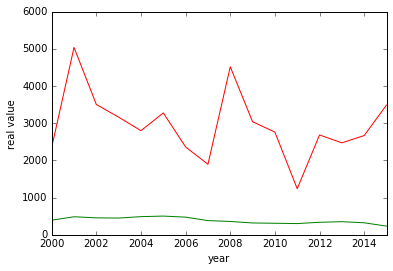

In [28]:
# your code here

plt.plot(review_statistics['max'],color="red")
plt.plot(review_statistics['mean'],color="green")
plt.axis([2000,2015,0,6000])
plt.xlabel('year')
plt.ylabel('real value')
plt.show()

### Problem 11

Given the x-axis as 'Rating', plot the number of movies (type: histogram).

> x-aixs : rating
>
> y-aixs : the number of movies

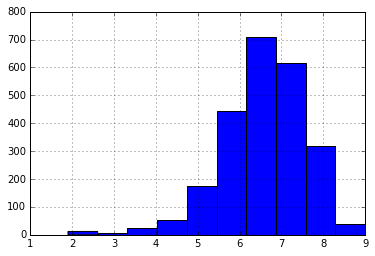

In [29]:
# your code here
plt.hist(movies['rating'])
plt.grid()
plt.show()